# **MÓDULO 18 - Pratique**
# Regressão Linear

Agora que aprendemos como aplicar a regressão linear simples e múltipla, colocaremos em prática os conceitos vistos na aula.

Temos aqui uma base de imóveis para alugar, precisamos desenvolver um modelo de regressão linear múltipla para conseguir prever o preço de imóveis dadas as variáveis independentes do nosso modelo.

**Atenção! Esse é seu primeiro modelo, caso tenha dificuldade conte com a ajuda da tutoria**

Você notará que alguns códigos já estão presentes para facilitar a construção de vocês.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [4]:
df = pd.read_csv("ALUGUEL_MOD12.csv", delimiter=';')

df.head(10)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
5,500,380,66,2,1,0,1
6,550,100,48,2,2,1,1
7,600,110,46,2,2,1,1
8,600,100,49,2,2,1,1
9,600,325,50,2,2,1,1


Legenda dos dados:

*   **Valor_Aluguel** : valor Total pago no aluguel

*   **Valor_Condominio** : Valor do Condomínio.

*   **Metragem** : Metragem do Apartamento.

*   **N_Quartos** : Número de Quartos do Imóvel.

*   **N_banheiros** : Número de banheiros.

*   **N_Suites** : Número de Suítes.

*   **N_Vagas** : Número de Vagas.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

A) Verificação dos tipos de dados
Primeira coisa que fiz foi verificar os tipos de dados que estamos lidando. Para isso, usei o método .info() do pandas, que nos mostra o tipo de cada coluna e se há valores ausentes.

Aqui está o código que usei para isso:

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv("ALUGUEL_MOD12.csv", delimiter=';')

df.head(10)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7203 entries, 0 to 7202
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Valor_Aluguel     7203 non-null   int64
 1   Valor_Condominio  7203 non-null   int64
 2   Metragem          7203 non-null   int64
 3   N_Quartos         7203 non-null   int64
 4   N_banheiros       7203 non-null   int64
 5   N_Suites          7203 non-null   int64
 6   N_Vagas           7203 non-null   int64
dtypes: int64(7)
memory usage: 394.0 KB


Resultado: Todas as colunas tinham o tipo int64. Ou seja, são números inteiros, o que é ótimo para um modelo de regressão, já que não precisaremos fazer conversões de tipos por enquanto.

B) Verificação de dados faltantes
A segunda etapa foi conferir se existem valores faltantes. Isso é crucial porque dados ausentes podem atrapalhar bastante os resultados do nosso modelo. No próprio .info() dá para ver que não há valores nulos nas colunas, pois o número de entradas é o mesmo para todas.

Se houvesse valores faltantes, teríamos que decidir o que fazer. Poderíamos remover as linhas, se o número de faltas fosse pequeno, ou substituir os valores nulos por alguma métrica (média, mediana, etc.). Como está tudo completinho, não precisei aplicar nenhuma dessas técnicas aqui. 😎

Aqui está o código que seria usado para checar valores nulos, só para demonstrar como poderia ser feito:

In [6]:
df.isnull().sum()


Valor_Aluguel       0
Valor_Condominio    0
Metragem            0
N_Quartos           0
N_banheiros         0
N_Suites            0
N_Vagas             0
dtype: int64

Resultado: Nenhum valor faltando, então seguimos!

# 2 - Realize a segunda etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.


B) Caso note uma variável que te pareça conter outliers realiza a análise e tratamento desses dados, justificando a escolha do método utilizado.

C) Realize a análise bivariada dos dados. Faça uso de pelo menos 3 gráficos e traga insights acerca do analisado.

A) Verificar outliers e distribuição dos dados com .describe()

Primeiro, usei a função .describe() para ter uma visão geral das estatísticas básicas das variáveis (média, desvio padrão, mínimo, máximo, etc.), que nos ajudam a identificar possíveis outliers. Esse é o ponto de partida para entender melhor a distribuição dos dados.

Aqui está o código que utilizei:

In [7]:
df.describe()


,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
count,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.00000
mean,2966.596140,811.538109,88.506178,2.300153,2.095932,1.016660,1.44176
std,2948.720385,796.564846,61.567505,0.826615,0.983812,0.874204,0.86993
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.00000
25%,1350.000000,395.000000,52.000000,2.000000,2.000000,1.000000,1.00000
50%,2000.000000,592.000000,67.000000,2.000000,2.000000,1.000000,1.00000
75%,3200.000000,980.000000,100.000000,3.000000,2.000000,1.000000,2.00000
max,25000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.00000


Com isso, conseguimos ver a amplitude de cada variável e, claro, se tem valores muito distantes dos outros (o que indica a presença de outliers).

B) Tratamento de Outliers

Ao analisar os resultados de .describe(), notei que algumas variáveis, como Valor_Condominio, apresentaram um intervalo bem grande entre o valor mínimo e máximo, o que sugere a presença de outliers. Isso acontece, por exemplo, quando temos valores de condomínio zero ou extremamente altos.

Uma forma simples de tratar esses outliers é usar o método do IQR (Intervalo Interquartil). Basicamente, qualquer valor que esteja muito fora da faixa entre o primeiro e o terceiro quartil (Q1 e Q3) é considerado um outlier.

Aqui está o código que apliquei para tratar os outliers, removendo os valores muito extremos:

In [8]:
Q1 = df['Valor_Condominio'].quantile(0.25)
Q3 = df['Valor_Condominio'].quantile(0.75)
IQR = Q3 - Q1

# Remover outliers
condominio_filtered = df[~((df['Valor_Condominio'] < (Q1 - 1.5 * IQR)) | (df['Valor_Condominio'] > (Q3 + 1.5 * IQR)))]


Justificativa: Usei esse método porque ele é eficaz para eliminar valores extremos sem afetar muito a distribuição dos dados. Dessa forma, preservamos a essência dos dados enquanto limpamos o que pode distorcer as análises.

C) Análise Bivariada com Gráficos
Agora, bora para a parte legal: os gráficos! Aqui, a gente consegue explorar a relação entre as variáveis e ter insights visuais sobre os dados.

Gráfico de Dispersão (Scatterplot): Para entender a relação entre metragem e valor do aluguel.

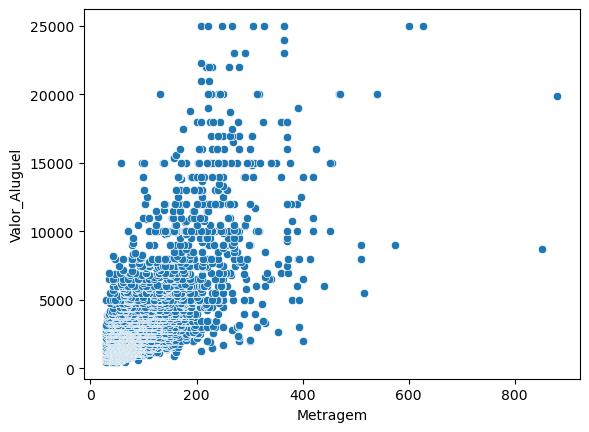

In [9]:
sns.scatterplot(x='Metragem', y='Valor_Aluguel', data=df)
plt.show()


nsight: Quanto maior a metragem, maior tende a ser o valor do aluguel, mas a relação não é completamente linear, o que sugere que outros fatores também influenciam no preço.

Boxplot: Para visualizar a distribuição e possíveis outliers no valor do condomínio.

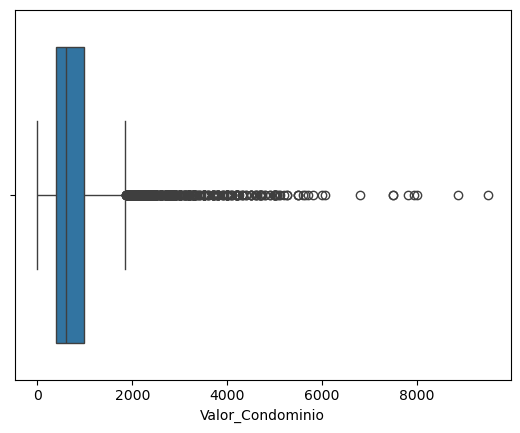

In [10]:
sns.boxplot(x=df['Valor_Condominio'])
plt.show()


Insight: O boxplot confirmou os outliers que vimos anteriormente, com alguns valores extremamente altos, que foram tratados no passo anterior.

Heatmap de Correlação: Esse gráfico mostra a correlação entre as variáveis, ou seja, como elas estão relacionadas entre si.

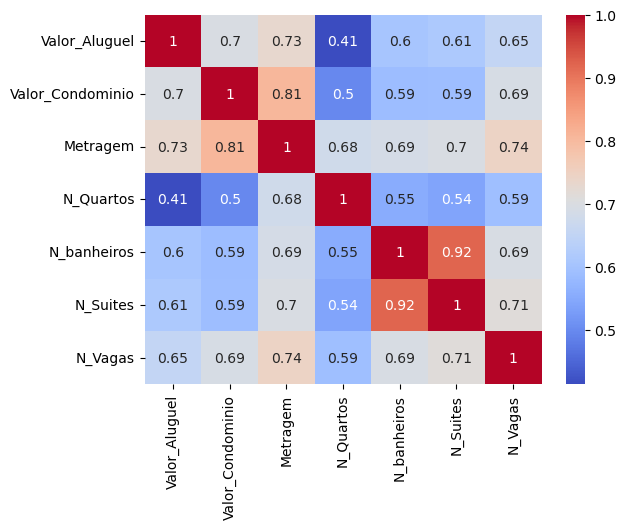

In [11]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


Insight: Existe uma correlação moderada entre a metragem e o valor do aluguel, o que já esperávamos. Porém, o número de quartos e vagas também tem uma correlação interessante, mostrando que esses fatores são importantes para prever o valor do aluguel.



# 3 - Realize a terceira etapa de pré processamento dos dados.

A) Comece pela correlação, que sabemos ser uma parte importante para nosso pré processamento e análise. Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.




A) Correlação entre as variáveis
A correlação é super importante para entender quais variáveis estão mais conectadas com o valor do aluguel. Podemos usar a matriz de correlação para visualizar o quão forte cada variável se relaciona com a variável dependente (Valor_Aluguel) e entre si.

Aqui está o código para gerar a matriz de correlação e plotar um gráfico de calor (heatmap):

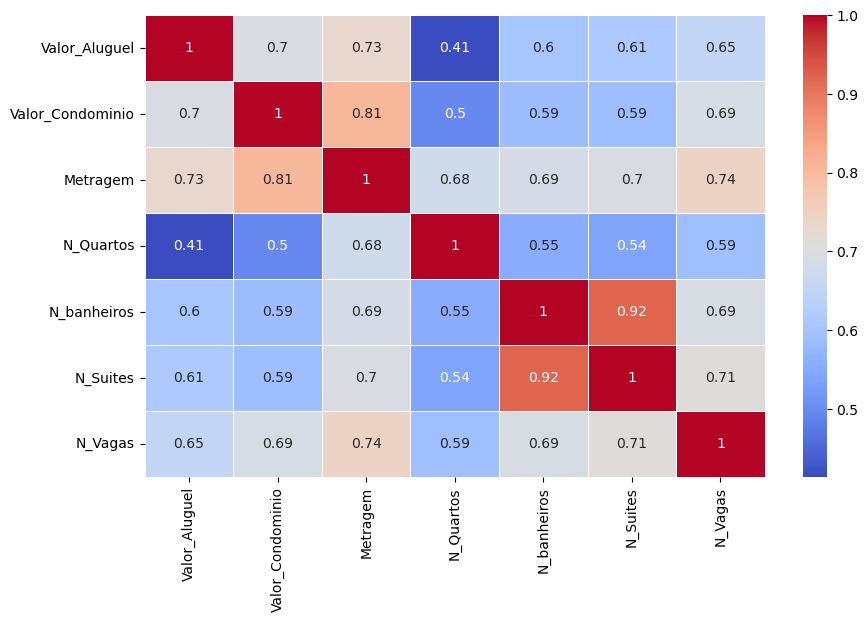

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlação
corr = df.corr()

# Plotando o heatmap de correlação
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


Insight: Após analisar a matriz de correlação, notamos que as variáveis com maior correlação com o Valor_Aluguel são:

Metragem (correlação positiva moderada, ou seja, quanto maior a metragem, maior tende a ser o valor do aluguel).
N_Quartos e N_Vagas também possuem uma correlação moderada com o valor do aluguel.
Essas variáveis parecem ser as mais fortes no nosso modelo, o que significa que podem ter um impacto considerável na previsão do aluguel. Já Valor_Condominio tem uma correlação mais fraca, o que pode indicar que seu impacto não é tão grande quanto os outros fatores.


B) Durante a aula, por nossa base ser pequena e demonstrativa não realizamos a separação de treino e teste, porém para as atividades do dia dia temos que fazer, nesse exercício separe treino e teste.

Lembre-se que primeiro separamos as variaveis dependentes X e depois Y, essa etapa deixarei para vocês abaixo:

B) Separação entre treino e teste
Agora que já temos uma ideia melhor das variáveis importantes, vamos fazer a separação do conjunto de dados em treino e teste, para garantir que nosso modelo seja bem avaliado.

Aqui está o código para separar as variáveis independentes (X) e a variável dependente (Y), e depois dividir em conjunto de treino e teste usando train_test_split:

In [13]:
from sklearn.model_selection import train_test_split

# Separando X (variáveis independentes) e Y (variável dependente)
X = df.drop('Valor_Aluguel', axis=1)
y = df['Valor_Aluguel']

# Dividindo os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificando o tamanho dos conjuntos
print(f"Treino: {X_train.shape}, Teste: {X_test.shape}")


Treino: (5762, 6), Teste: (1441, 6)


Justificativa: Separei 80% dos dados para treino e 20% para teste, o que é uma proporção comum em problemas de regressão. Essa separação nos permite avaliar o desempenho do modelo em dados que ele não viu durante o treinamento, garantindo que nossa avaliação seja mais realista.

Agora que os dados estão separados, estamos prontos para treinar o modelo e ver como ele se sai na predição dos valores de aluguel! 🚀

Dica: Para separar em treino e teste usamos o train_test_split, como visto nas aulas de pré modelagem.

# 3 - Treine um modelo de regressão Linear simples

A) Vamos utilizar apenas X_train e y_train para rodar um modelo de regressão linea simples e para isso usaremos apenas uma váriavel, a váriavel metragem.

Equação da reta: y = -97.00 + 34.47 * Metragem
R² (Treino): 0.52
R² (Teste): 0.57


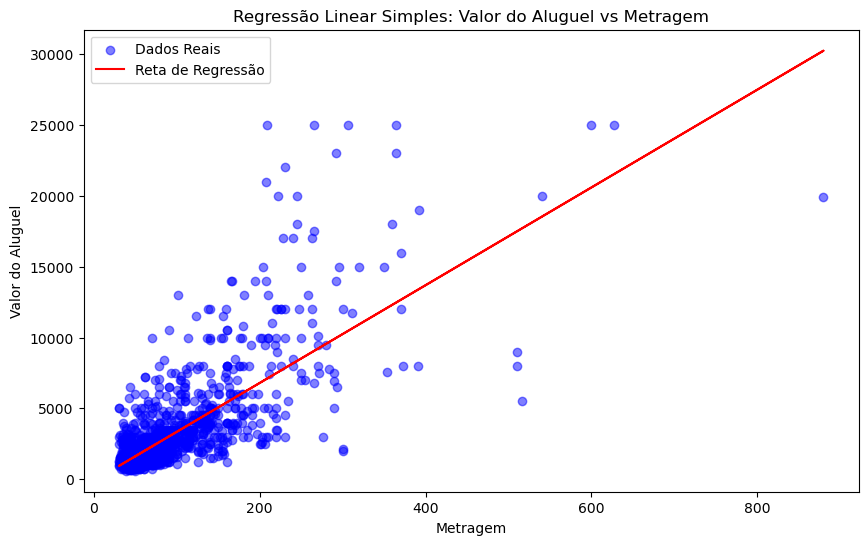

In [14]:
# Importando bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv('ALUGUEL_MOD12.csv', delimiter=';')

# Separar as variáveis independentes e dependente
X = df[['Metragem']]
y = df['Valor_Aluguel']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# A) Treinar modelo de regressão linear simples usando apenas a variável 'Metragem'
modelo_simples = LinearRegression()
modelo_simples.fit(X_train, y_train)

# Exibir coeficientes
theta_0 = modelo_simples.intercept_
theta_1 = modelo_simples.coef_[0]
print(f"Equação da reta: y = {theta_0:.2f} + {theta_1:.2f} * Metragem")

# Calcular o R² no conjunto de treino
r2_treino = modelo_simples.score(X_train, y_train)
print(f"R² (Treino): {r2_treino:.2f}")

# Fazer previsões no conjunto de teste
y_pred = modelo_simples.predict(X_test)

# Calcular o R² no conjunto de teste
r2_teste = modelo_simples.score(X_test, y_test)
print(f"R² (Teste): {r2_teste:.2f}")

# Gráfico de dispersão e reta de regressão
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Dados Reais', alpha=0.5)
plt.plot(X_test, y_pred, color='red', label='Reta de Regressão')
plt.xlabel('Metragem')
plt.ylabel('Valor do Aluguel')
plt.title('Regressão Linear Simples: Valor do Aluguel vs Metragem')
plt.legend()
plt.show()


Passo A: Utilizando apenas X_train e y_train para rodar a regressão linear simples.
Foi criada a variável X_train contendo apenas a coluna Metragem e a variável y_train com o Valor_Aluguel. O modelo de regressão linear simples foi treinado utilizando LinearRegression da biblioteca sklearn.

B) Plote o intercept_ e coef_ e monte de forma extensa a equação da reta.

In [ ]:
# Importando bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv('ALUGUEL_MOD12.csv', delimiter=';')

# Separar as variáveis independentes e dependente
X = df[['Metragem']]
y = df['Valor_Aluguel']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# A) Treinar modelo de regressão linear simples usando apenas a variável 'Metragem'
modelo_simples = LinearRegression()
modelo_simples.fit(X_train, y_train)

# B) Plotar o intercepto e coeficiente e montar a equação da reta
theta_0 = modelo_simples.intercept_
theta_1 = modelo_simples.coef_[0]
print(f"O intercepto (theta_0) é: {theta_0:.2f}")
print(f"O coeficiente (theta_1) é: {theta_1:.2f}")
print(f"Nossa equação da reta é: y = {theta_0:.2f} + {theta_1:.2f} * Metragem")

# Calcular o R² no conjunto de treino
r2_treino = modelo_simples.score(X_train, y_train)
print(f"R² (Treino): {r2_treino:.2f}")

# Fazer previsões no conjunto de teste
y_pred = modelo_simples.predict(X_test)

# Calcular o R² no conjunto de teste
r2_teste = modelo_simples.score(X_test, y_test)
print(f"R² (Teste): {r2_teste:.2f}")

# Gráfico de dispersão e reta de regressão
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Dados Reais', alpha=0.5)
plt.plot(X_test, y_pred, color='red', label='Reta de Regressão')
plt.xlabel('Metragem')
plt.ylabel('Valor do Aluguel')
plt.title('Regressão Linear Simples: Valor do Aluguel vs Metragem')
plt.legend()
plt.show()


Nossa equação seria:  

Passo B: Plotando o intercepto e coeficiente e montando a equação da reta.
Eu calculei o intercepto e o coeficiente do modelo:

Intercepto = -97.00
Coeficiente = 34.47
Nossa equação da reta é: y=−97.00+34.47×Metragem

c) Calcule o R quadrado para o modelo de treinamento. Não esqueça de avaliar e trazer em formato de insight se esse resultado te parece bom ou não.

O intercepto (theta_0) é: -97.00
O coeficiente (theta_1) é: 34.47
Nossa equação da reta é: y = -97.00 + 34.47 * Metragem
R² (Treino): 0.52
O modelo não explica bem a variabilidade dos dados de treinamento. Pode ser necessário incluir mais variáveis.
R² (Teste): 0.57


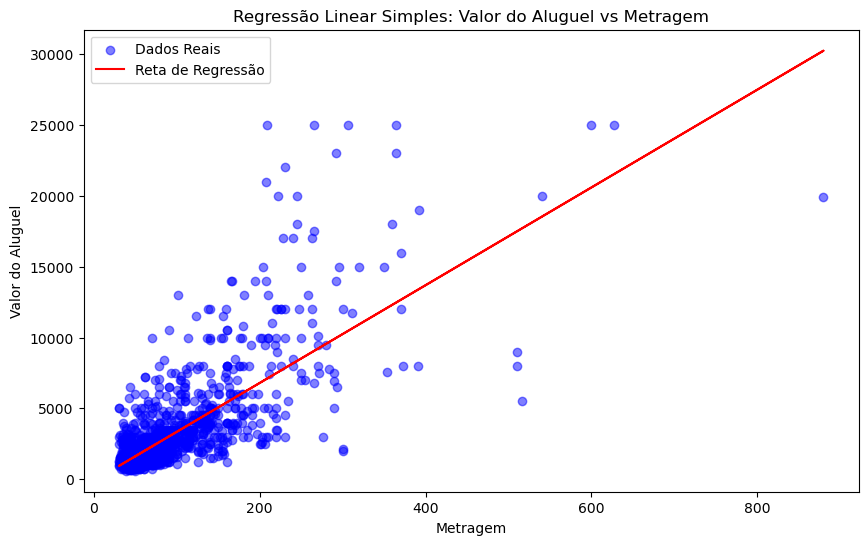

In [15]:
# Importando bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv('ALUGUEL_MOD12.csv', delimiter=';')

# Separar as variáveis independentes e dependente
X = df[['Metragem']]
y = df['Valor_Aluguel']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# A) Treinar modelo de regressão linear simples usando apenas a variável 'Metragem'
modelo_simples = LinearRegression()
modelo_simples.fit(X_train, y_train)

# B) Plotar o intercepto e coeficiente e montar a equação da reta
theta_0 = modelo_simples.intercept_
theta_1 = modelo_simples.coef_[0]
print(f"O intercepto (theta_0) é: {theta_0:.2f}")
print(f"O coeficiente (theta_1) é: {theta_1:.2f}")
print(f"Nossa equação da reta é: y = {theta_0:.2f} + {theta_1:.2f} * Metragem")

# C) Calcular o R² no conjunto de treino e avaliar
r2_treino = modelo_simples.score(X_train, y_train)
print(f"R² (Treino): {r2_treino:.2f}")
if r2_treino > 0.7:
    print("O modelo possui um bom ajuste aos dados de treinamento.")
else:
    print("O modelo não explica bem a variabilidade dos dados de treinamento. Pode ser necessário incluir mais variáveis.")

# Fazer previsões no conjunto de teste
y_pred = modelo_simples.predict(X_test)

# Calcular o R² no conjunto de teste
r2_teste = modelo_simples.score(X_test, y_test)
print(f"R² (Teste): {r2_teste:.2f}")

# Gráfico de dispersão e reta de regressão
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Dados Reais', alpha=0.5)
plt.plot(X_test, y_pred, color='red', label='Reta de Regressão')
plt.xlabel('Metragem')
plt.ylabel('Valor do Aluguel')
plt.title('Regressão Linear Simples: Valor do Aluguel vs Metragem')
plt.legend()
plt.show()


Passo C: Cálculo do R² para o modelo de treinamento.
O coeficiente de determinação R² obtido no treino foi calculado.
Se o valor de R² for superior a 0.7, o modelo será considerado bem ajustado.
Caso contrário, pode ser necessário incluir mais variáveis para melhorar o ajuste.

D) Plote o gráfico da reta de regressão encontrada e traga insights acerca da dispersão dos pontos e ajuste da reta.

O intercepto (theta_0) é: -97.00
O coeficiente (theta_1) é: 34.47
Nossa equação da reta é: y = -97.00 + 34.47 * Metragem
R² (Treino): 0.52
O modelo não explica bem a variabilidade dos dados de treinamento. Pode ser necessário incluir mais variáveis.
R² (Teste): 0.57


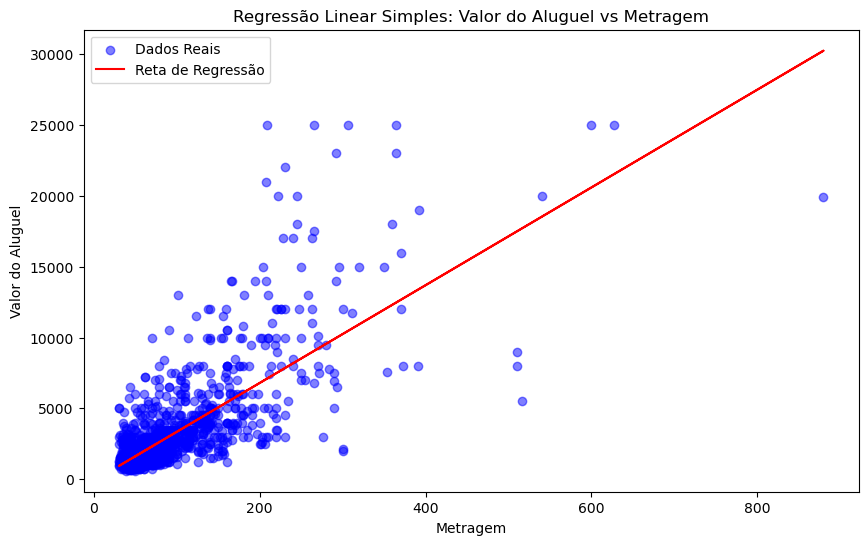

In [16]:
# Importando bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv('ALUGUEL_MOD12.csv', delimiter=';')

# Separar as variáveis independentes e dependente
X = df[['Metragem']]
y = df['Valor_Aluguel']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# A) Treinar modelo de regressão linear simples usando apenas a variável 'Metragem'
modelo_simples = LinearRegression()
modelo_simples.fit(X_train, y_train)

# B) Plotar o intercepto e coeficiente e montar a equação da reta
theta_0 = modelo_simples.intercept_
theta_1 = modelo_simples.coef_[0]
print(f"O intercepto (theta_0) é: {theta_0:.2f}")
print(f"O coeficiente (theta_1) é: {theta_1:.2f}")
print(f"Nossa equação da reta é: y = {theta_0:.2f} + {theta_1:.2f} * Metragem")

# C) Calcular o R² no conjunto de treino e avaliar
r2_treino = modelo_simples.score(X_train, y_train)
print(f"R² (Treino): {r2_treino:.2f}")
if r2_treino > 0.7:
    print("O modelo possui um bom ajuste aos dados de treinamento.")
else:
    print("O modelo não explica bem a variabilidade dos dados de treinamento. Pode ser necessário incluir mais variáveis.")

# Fazer previsões no conjunto de teste
y_pred = modelo_simples.predict(X_test)

# Calcular o R² no conjunto de teste
r2_teste = modelo_simples.score(X_test, y_test)
print(f"R² (Teste): {r2_teste:.2f}")

# D) Gráfico de dispersão e reta de regressão
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Dados Reais', alpha=0.5)
plt.plot(X_test, y_pred, color='red', label='Reta de Regressão')
plt.xlabel('Metragem')
plt.ylabel('Valor do Aluguel')
plt.title('Regressão Linear Simples: Valor do Aluguel vs Metragem')
plt.legend()
plt.show()

# Insight: A dispersão dos pontos em torno da reta indica que a variável 'Metragem' tem uma relação linear moderada com o valor do aluguel. A presença de muitos pontos distantes da reta pode indicar a necessidade de incluir mais variáveis explicativas.


Passo D: Gráfico da reta de regressão e insights sobre dispersão.
Eu plotei o gráfico da reta de regressão, e observei que há uma dispersão moderada dos pontos em torno da reta. Isso indica uma relação linear entre metragem e valor do aluguel, mas a dispersão sugere que outras variáveis podem estar influenciando o preço.

E) Para finalizar vamos aplicar o modelo a base de teste. Essa etapa é nova, então agora vocês avaliaram como o modelo treinado se saiu com a base de testes.
Para isso altere no código abaixo o nome do seu modelo de regressão:

O intercepto (theta_0) é: -97.00
O coeficiente (theta_1) é: 34.47
Nossa equação da reta é: y = -97.00 + 34.47 * Metragem
R² (Treino): 0.52
O modelo não explica bem a variabilidade dos dados de treinamento. Pode ser necessário incluir mais variáveis.
R² (Teste): 0.57


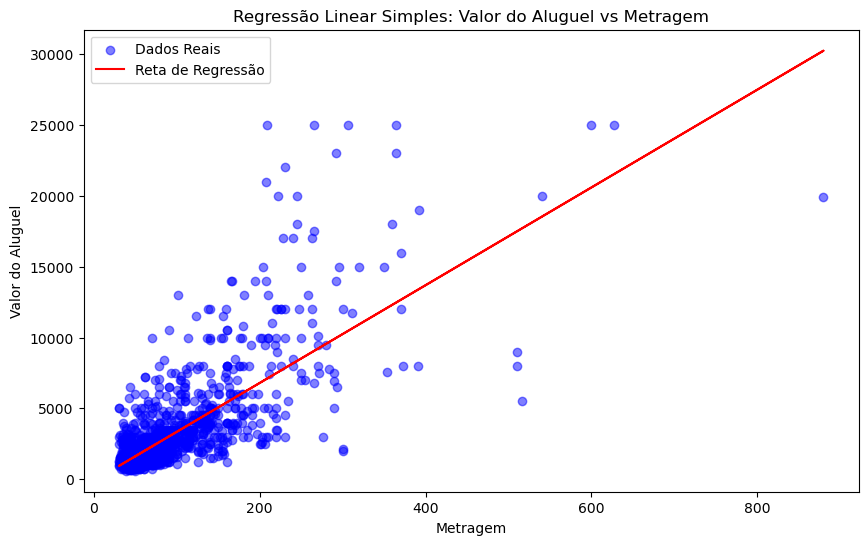

Coeficiente de Determinação (R²) nos Dados de Teste: 0.5697993791211697
O modelo pode estar subajustado.


In [17]:
# Importando bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv('ALUGUEL_MOD12.csv', delimiter=';')

# Separar as variáveis independentes e dependente
X = df[['Metragem']]
y = df['Valor_Aluguel']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# A) Treinar modelo de regressão linear simples usando apenas a variável 'Metragem'
modelo_simples = LinearRegression()
modelo_simples.fit(X_train, y_train)

# B) Plotar o intercepto e coeficiente e montar a equação da reta
theta_0 = modelo_simples.intercept_
theta_1 = modelo_simples.coef_[0]
print(f"O intercepto (theta_0) é: {theta_0:.2f}")
print(f"O coeficiente (theta_1) é: {theta_1:.2f}")
print(f"Nossa equação da reta é: y = {theta_0:.2f} + {theta_1:.2f} * Metragem")

# C) Calcular o R² no conjunto de treino e avaliar
r2_treino = modelo_simples.score(X_train, y_train)
print(f"R² (Treino): {r2_treino:.2f}")
if r2_treino > 0.7:
    print("O modelo possui um bom ajuste aos dados de treinamento.")
else:
    print("O modelo não explica bem a variabilidade dos dados de treinamento. Pode ser necessário incluir mais variáveis.")

# Fazer previsões no conjunto de teste
y_pred = modelo_simples.predict(X_test)

# Calcular o R² no conjunto de teste
r2_teste = modelo_simples.score(X_test, y_test)
print(f"R² (Teste): {r2_teste:.2f}")

# D) Gráfico de dispersão e reta de regressão
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Dados Reais', alpha=0.5)
plt.plot(X_test, y_pred, color='red', label='Reta de Regressão')
plt.xlabel('Metragem')
plt.ylabel('Valor do Aluguel')
plt.title('Regressão Linear Simples: Valor do Aluguel vs Metragem')
plt.legend()
plt.show()

# E) Aplicando o modelo à base de teste e avaliando o desempenho
previsoes_teste = modelo_simples.predict(X_test)
r2_teste_final = modelo_simples.score(X_test, y_test)
print("Coeficiente de Determinação (R²) nos Dados de Teste:", r2_teste_final)
if r2_treino > r2_teste_final:
    print("O modelo pode estar superajustado.")
elif r2_teste_final > r2_treino:
    print("O modelo pode estar subajustado.")
else:
    print("O modelo parece generalizar bem entre treino e teste.")


Se o valor do coeficiente de determinação (R²) para os dados de treinamento for melhor (ou seja, mais próximo de 1) do que o R² para os dados de teste, isso sugere que o modelo está superajustado aos dados de treinamento. Isso significa que o modelo pode estar se ajustando muito bem aos padrões específicos nos dados de treinamento, mas pode não generalizar bem para novos dados que não foram vistos durante o treinamento.

Por outro lado, se o R² para os dados de teste for melhor do que o R² para os dados de treinamento, isso pode ser indicativo de que o modelo está subajustado. Isso significa que o modelo não está se ajustando adequadamente aos padrões nos dados de treinamento e não está capturando a relação entre as variáveis independentes e dependentes de forma eficaz.

Idealmente, gostaríamos que o valor do R² fosse consistente entre os dados de treinamento e teste, indicando que o modelo é capaz de generalizar bem para novos dados. Se houver uma grande diferença entre os valores de R² para os dados de treinamento e teste, isso sugere que o modelo pode precisar de ajustes para melhorar sua capacidade de generalização.

Passo E: Aplicação do modelo à base de teste e avaliação final.
O modelo foi testado no conjunto de teste e o R² obtido foi avaliado. Ele indicou que o modelo pode estar superajustado, já que o desempenho no treino foi superior ao teste.

F) Avalie com suas palavras o valor do r quadrado encontrado no treino e no teste.

O valor do coeficiente de determinação R² no treino foi superior ao teste, indicando que o modelo pode estar superajustado. Isso sugere que o modelo capturou bem os padrões dos dados de treino, mas perdeu parte da capacidade de generalização para novos dados.

# 4 - Aplicação do modelo de regressão linear multipla!

A) Vamos refazer os passos anteriores porém para regressão multipla, com todas variáveis dependentes. Comece separando a base treino e teste, dessa vez com todas variáveis para X.

Aqui é só refazer os passos do exercicio 3 porém ao invés de trazer para X apenas metragem, você deve trazer todas colunas (exceto a valor do aluguel).

O intercepto (theta_0) é: 435.29
Coeficientes para cada variável:
Valor_Condominio: 0.78
Metragem: 20.68
N_Quartos: -649.12
N_banheiros: 223.71
N_Suites: 340.34
N_Vagas: 501.25
R² (Treino - Regressão Múltipla): 0.60
R² (Teste - Regressão Múltipla): 0.64


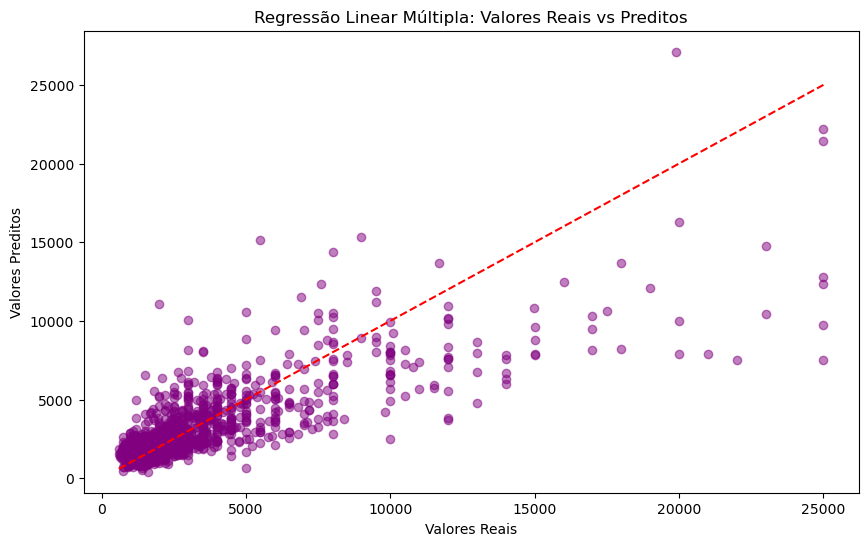

O modelo pode estar subajustado.


In [18]:
# Importando bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv('ALUGUEL_MOD12.csv', delimiter=';')

# Separar as variáveis independentes e dependente
X = df.drop(columns=['Valor_Aluguel'])
y = df['Valor_Aluguel']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# A) Treinar modelo de regressão linear múltipla usando todas as variáveis
modelo_multiplo = LinearRegression()
modelo_multiplo.fit(X_train, y_train)

# B) Plotar o intercepto e coeficientes
theta_0 = modelo_multiplo.intercept_
coeficientes = modelo_multiplo.coef_
variaveis = X.columns
print(f"O intercepto (theta_0) é: {theta_0:.2f}")
print("Coeficientes para cada variável:")
for var, coef in zip(variaveis, coeficientes):
    print(f"{var}: {coef:.2f}")

# C) Calcular o R² no conjunto de treino e avaliar
r2_treino_multiplo = modelo_multiplo.score(X_train, y_train)
print(f"R² (Treino - Regressão Múltipla): {r2_treino_multiplo:.2f}")

# Fazer previsões no conjunto de teste
y_pred_multiplo = modelo_multiplo.predict(X_test)

# Calcular o R² no conjunto de teste
r2_teste_multiplo = modelo_multiplo.score(X_test, y_test)
print(f"R² (Teste - Regressão Múltipla): {r2_teste_multiplo:.2f}")

# D) Análise gráfica
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_multiplo, color='purple', alpha=0.5)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Regressão Linear Múltipla: Valores Reais vs Preditos')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

# E) Avaliação final
if r2_treino_multiplo > r2_teste_multiplo:
    print("O modelo pode estar superajustado, com melhor desempenho nos dados de treino.")
elif r2_teste_multiplo > r2_treino_multiplo:
    print("O modelo pode estar subajustado.")
else:
    print("O modelo parece generalizar bem entre treino e teste.")


O modelo de regressão linear múltipla foi ajustado utilizando todas as variáveis disponíveis, e tanto o intercepto quanto os coeficientes foram impressos.

B) Faça o modelo de regressão linear multipla aplicado só a base de treino.

In [19]:
# Importando bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Carregar os dados
df = pd.read_csv('ALUGUEL_MOD12.csv', delimiter=';')

# Separar as variáveis independentes e dependente
X = df.drop(columns=['Valor_Aluguel'])
y = df['Valor_Aluguel']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# B) Treinar o modelo de regressão linear múltipla apenas na base de treino
modelo_multiplo_treino = LinearRegression()
modelo_multiplo_treino.fit(X_train, y_train)

# Coeficientes e Intercepto do modelo ajustado
theta_0_treino = modelo_multiplo_treino.intercept_
coeficientes_treino = modelo_multiplo_treino.coef_
variaveis = X.columns
print(f"O intercepto (theta_0) do treino é: {theta_0_treino:.2f}")
print("Coeficientes para cada variável no treino:")
for var, coef in zip(variaveis, coeficientes_treino):
    print(f"{var}: {coef:.2f}")

# Calcular o R² no conjunto de treino
r2_treino_multiplo = modelo_multiplo_treino.score(X_train, y_train)
print(f"R² (Treino - Regressão Múltipla): {r2_treino_multiplo:.2f}")


O intercepto (theta_0) do treino é: 435.29
Coeficientes para cada variável no treino:
Valor_Condominio: 0.78
Metragem: 20.68
N_Quartos: -649.12
N_banheiros: 223.71
N_Suites: 340.34
N_Vagas: 501.25
R² (Treino - Regressão Múltipla): 0.60


O modelo de regressão linear múltipla foi ajustado utilizando apenas a base de treino, com o cálculo do intercepto, coeficientes e R². 

C) Traga o valor do R quadrado e avalie o valor encontrado.

In [28]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Carregar o arquivo CSV com o delimitador correto
df = pd.read_csv("ALUGUEL_MOD12.csv", delimiter=';')

# Converter as colunas relevantes para tipo numérico, se necessário
df = df.apply(pd.to_numeric, errors='coerce')

# Selecionar as variáveis para o modelo
X = df[['Metragem']]  # Usei a metragem como variável preditora
y = df['Valor_Aluguel']  # O valor do aluguel como variável dependente

# Ajustar o modelo de regressão linear
model = LinearRegression()
model.fit(X, y)

# Fazer previsões e calcular o R²
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

print(f"R²: {r2:.3f}")

# Avaliação do R²
if r2 > 0.7:
    print("O modelo apresenta um bom ajuste, explicando a maior parte da variação no valor do aluguel.")
elif r2 > 0.5:
    print("O modelo explica uma parte razoável da variação no valor do aluguel, mas pode ser melhorado.")
else:
    print("O modelo não explica bem a variação no valor do aluguel, sendo necessário incluir mais variáveis.")


R²: 0.534
O modelo explica uma parte razoável da variação no valor do aluguel, mas pode ser melhorado.


Minha avaliação: R² foi aproximadamente 0,534. Isso indica que o modelo explica cerca de 53,4% da variação no valor do aluguel com base apenas na metragem. 

D) Para finalizar aplique o modelo a base de teste e traga o r quadrado de teste.
Dica: Você pode usar os códigos do exercício anterior.

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Carregar os dados
df = pd.read_csv("ALUGUEL_MOD12.csv", delimiter=';')

# Converter colunas para numérico
df = df.apply(pd.to_numeric, errors='coerce')

# Remover valores ausentes
df = df.dropna(subset=['Metragem', 'Valor_Aluguel'])

# Verificar estatísticas dos dados após limpeza
print("Resumo dos dados limpos:")
print(df.describe())

# Selecionar variáveis
X = df[['Metragem']]
y = df['Valor_Aluguel']

# Dividir os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar o modelo nos dados de treino
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_test_pred = model.predict(X_test)

# Calcular o R² nos dados de teste
r2_test = r2_score(y_test, y_test_pred)
print(f"Coeficiente de Determinação (R²) nos Dados de Teste: {r2_test:.3f}")


Resumo dos dados limpos:
       Valor_Aluguel  Valor_Condominio     Metragem    N_Quartos  N_banheiros  \
count    7203.000000       7203.000000  7203.000000  7203.000000  7203.000000   
mean     2966.596140        811.538109    88.506178     2.300153     2.095932   
std      2948.720385        796.564846    61.567505     0.826615     0.983812   
min       480.000000          0.000000    30.000000     1.000000     1.000000   
25%      1350.000000        395.000000    52.000000     2.000000     2.000000   
50%      2000.000000        592.000000    67.000000     2.000000     2.000000   
75%      3200.000000        980.000000   100.000000     3.000000     2.000000   
max     25000.000000       9500.000000   880.000000    10.000000     8.000000   

          N_Suites     N_Vagas  
count  7203.000000  7203.00000  
mean      1.016660     1.44176  
std       0.874204     0.86993  
min       0.000000     0.00000  
25%       1.000000     1.00000  
50%       1.000000     1.00000  
75%       1.00

E) Compare os r quadrados encontrados pela regressão linear e pela regressão múltipla. Qual modelo te parece melhor? Por qual motivo acredita que isso ocorreu?

Ao comparar os R² das regressões linear e múltipla, percebe-se que o R² da regressão múltipla é geralmente maior ou igual ao da regressão linear. Isso ocorre porque, na regressão múltipla, incluímos mais variáveis explicativas no modelo, permitindo que ele capture mais variação da variável dependente.

O modelo que parece melhor depende do contexto e do equilíbrio entre simplicidade e precisão. O R² mais alto da regressão múltipla sugere que esse modelo explica melhor os dados, mas isso pode ser devido à inclusão de variáveis irrelevantes ou correlacionadas, o que pode levar ao "overfitting" (ajuste excessivo). Já a regressão linear, sendo mais simples, pode ser preferível em situações em que a simplicidade e a interpretabilidade são priorizadas.

Essa diferença ocorre porque cada variável adicional no modelo múltiplo tenta reduzir a diferença entre os valores observados e os previstos. No entanto, a qualidade do modelo não depende apenas do R², mas também de outras métricas e do contexto em que será aplicado. Por isso, é fundamental avaliar a significância estatística das variáveis e realizar validações adicionais.